In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Задание 1

In [2]:
!wget https://courses.openedu.ru/assets/courseware/v1/6198dc195c9dd9b03fab679d4f0d2f6a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/saint-petersbourg-1936035_1280.jpg

--2023-09-09 18:40:01--  https://courses.openedu.ru/assets/courseware/v1/6198dc195c9dd9b03fab679d4f0d2f6a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/saint-petersbourg-1936035_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208290 (203K) [image/jpeg]
Saving to: ‘saint-petersbourg-1936035_1280.jpg’

saint-petersbourg-1 100%[===================>] 203.41K   490KB/s    in 0.4s    

2023-09-09 18:40:02 (490 KB/s) - ‘saint-petersbourg-1936035_1280.jpg’ saved [208290/208290]



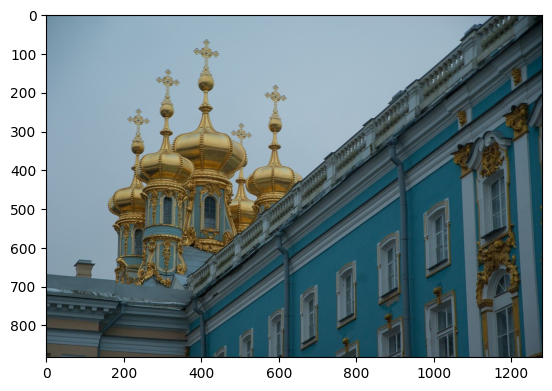

In [3]:
image_name = 'saint-petersbourg-1936035_1280.jpg'

img = cv2.imread(image_name)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

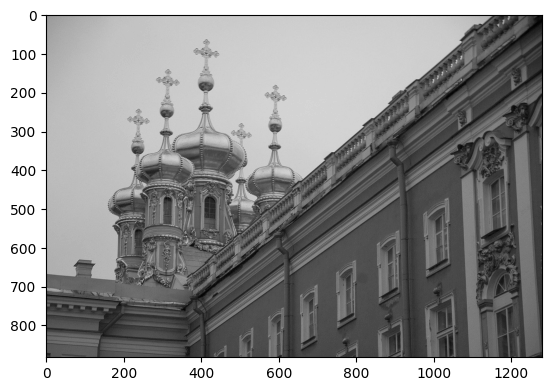

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

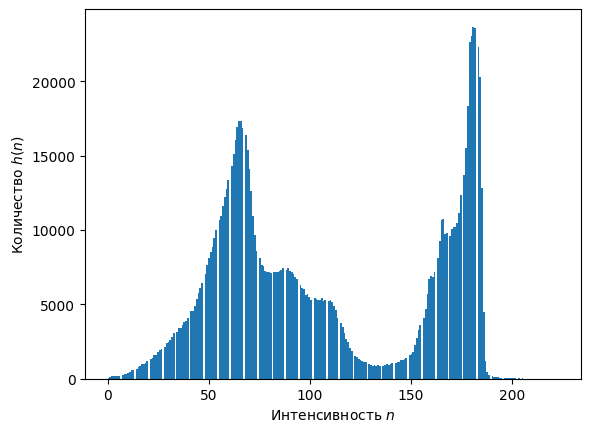

In [5]:
gray_hist = plt.hist(gray_img.ravel(), bins = 256)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество $h(n)$')
plt.show()

In [23]:
n, h = np.unique (gray_img.ravel(), return_counts= True)

In [25]:
max(h)

23684

In [26]:
n[h.argmax()]

181

# Задание 2

In [27]:
!wget https://courses.openedu.ru/assets/courseware/v1/b1c17f10f3175e5c8a4dffa2257cf01b/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/russia-2396022_1280.jpg

--2023-09-09 19:14:20--  https://courses.openedu.ru/assets/courseware/v1/b1c17f10f3175e5c8a4dffa2257cf01b/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/russia-2396022_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138907 (136K) [image/jpeg]
Saving to: ‘russia-2396022_1280.jpg’

russia-2396022_1280 100%[===================>] 135.65K   404KB/s    in 0.3s    

2023-09-09 19:14:21 (404 KB/s) - ‘russia-2396022_1280.jpg’ saved [138907/138907]



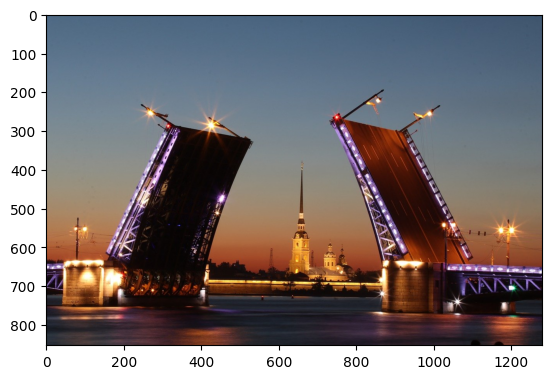

In [28]:
image_name = 'russia-2396022_1280.jpg'

img = cv2.imread(image_name)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

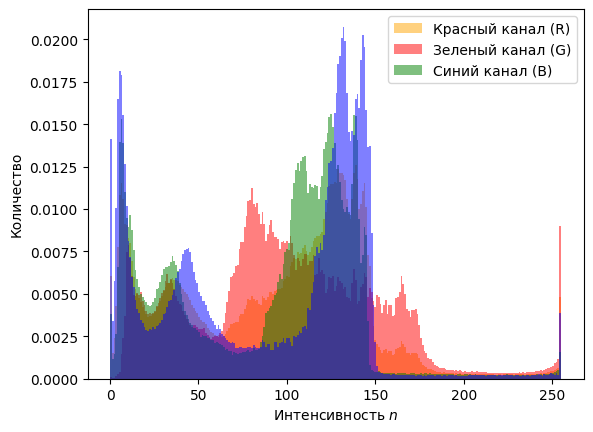

In [34]:
plt.hist(RGB_img.ravel(), bins = 256, color = 'orange', alpha = 0.5, density=True)
plt.hist(RGB_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)
plt.hist(RGB_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
plt.hist(RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
plt.legend(['Красный канал (R)', 'Зеленый канал (G)', 'Cиний канал (B)'])
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.show()

In [35]:
def get_h_n (img):
  n, h = np.unique (img.ravel(), return_counts= True)
  return max(h)/len(img.ravel()), n[h.argmax()]

In [38]:
print (f'{get_h_n (RGB_img[:, :, 0])} красный')
print (f'{get_h_n (RGB_img[:, :, 1])} зеленый')
print (f'{get_h_n (RGB_img[:, :, 2])} синий')

(0.011217760844079718, 80) красный
(0.015516009671746775, 125) зеленый
(0.020662368112543964, 132) синий


# Задание 3

In [39]:
!wget https://courses.openedu.ru/assets/courseware/v1/c268019f883825bbfc3a434023d9a06e/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/hermitage-3711588_1280.jpg

--2023-09-09 19:37:44--  https://courses.openedu.ru/assets/courseware/v1/c268019f883825bbfc3a434023d9a06e/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/hermitage-3711588_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414781 (405K) [image/jpeg]
Saving to: ‘hermitage-3711588_1280.jpg’

hermitage-3711588_1 100%[===================>] 405.06K   770KB/s    in 0.5s    

2023-09-09 19:37:45 (770 KB/s) - ‘hermitage-3711588_1280.jpg’ saved [414781/414781]



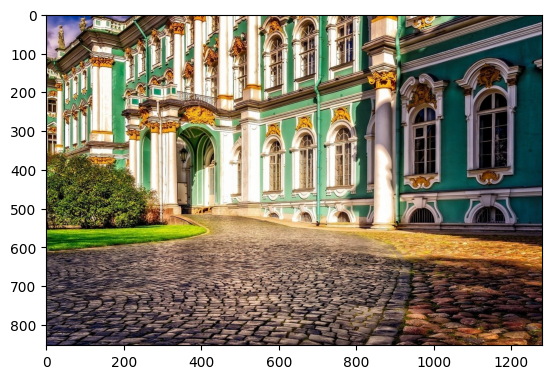

In [40]:
image_name = 'hermitage-3711588_1280.jpg'

img = cv2.imread(image_name)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

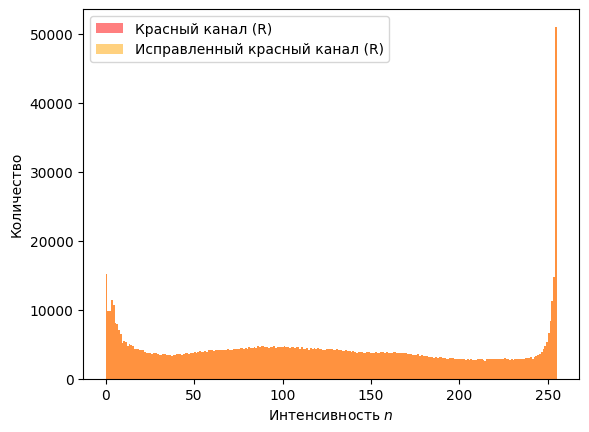

In [42]:
RGB_img_new = RGB_img.copy()
RGB_img_new[:, :, 0] = (RGB_img[:, :, 0] - np.min(RGB_img[:, :, 0]))/(np.max(RGB_img[:, :, 0]) - np.min(RGB_img[:, :, 0]))*255
plt.hist(RGB_img[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.hist(RGB_img_new[:, :, 0].ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.legend(['Красный канал (R)', 'Исправленный красный канал (R)'])
plt.show()


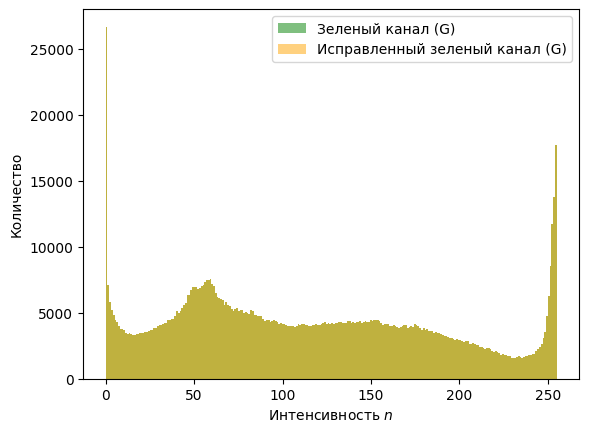

In [43]:
RGB_img_new[:, :, 1] = (RGB_img[:, :, 1] - np.min(RGB_img[:, :, 1]))/(np.max(RGB_img[:, :, 1]) - np.min(RGB_img[:, :, 1]))*255
plt.hist(RGB_img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(RGB_img_new[:, :, 1].ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.legend(['Зеленый канал (G)', 'Исправленный зеленый канал (G)'])
plt.show()

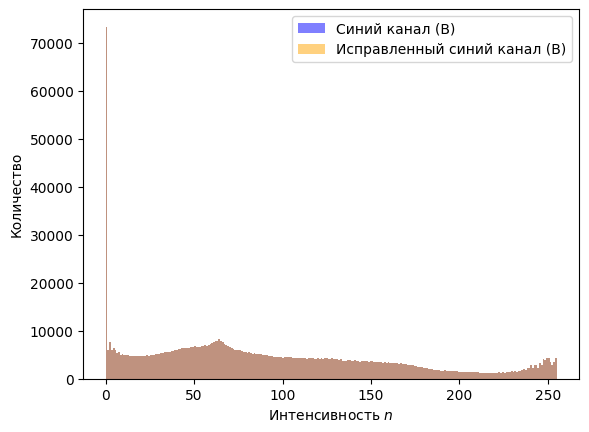

In [44]:
RGB_img_new[:, :, 2] = (RGB_img[:, :, 2] - np.min(RGB_img[:, :, 2]))/(np.max(RGB_img[:, :, 2]) - np.min(RGB_img[:, :, 2]))*255
plt.hist(RGB_img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.hist(RGB_img_new[:, :, 2].ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.legend(['Синий канал (B)', 'Исправленный синий канал (B)'])
plt.show()

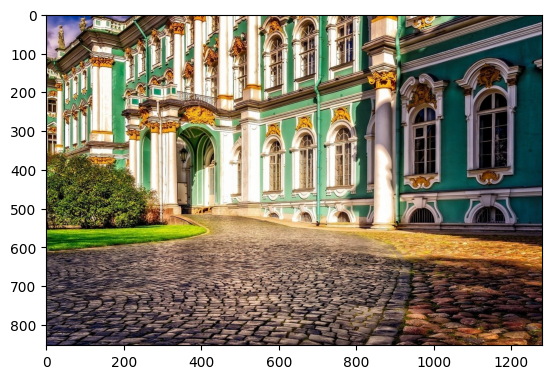

In [45]:
plt.imshow(RGB_img_new)

In [46]:
RGB_img_new[422, 630]

array([144, 192, 150], dtype=uint8)

# Задание 4

In [47]:
!wget https://courses.openedu.ru/assets/courseware/v1/6198dc195c9dd9b03fab679d4f0d2f6a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/saint-petersbourg-1936035_1280.jpg

--2023-09-09 19:53:10--  https://courses.openedu.ru/assets/courseware/v1/6198dc195c9dd9b03fab679d4f0d2f6a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/saint-petersbourg-1936035_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208290 (203K) [image/jpeg]
Saving to: ‘saint-petersbourg-1936035_1280.jpg.1’

saint-petersbourg-1 100%[===================>] 203.41K   505KB/s    in 0.4s    

2023-09-09 19:53:11 (505 KB/s) - ‘saint-petersbourg-1936035_1280.jpg.1’ saved [208290/208290]



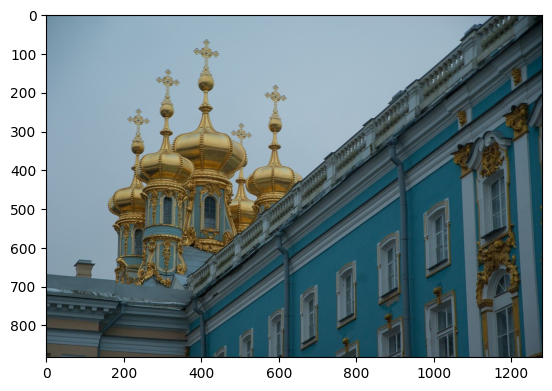

In [48]:
image_name = 'saint-petersbourg-1936035_1280.jpg'
img = cv2.imread(image_name)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

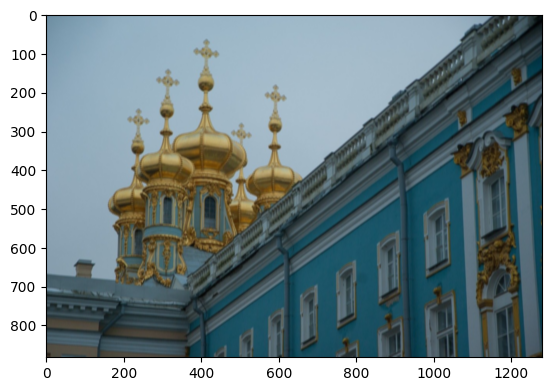

In [49]:
RGB_img_new = cv2.GaussianBlur(RGB_img, (3,7), 3)
plt.imshow(RGB_img_new)

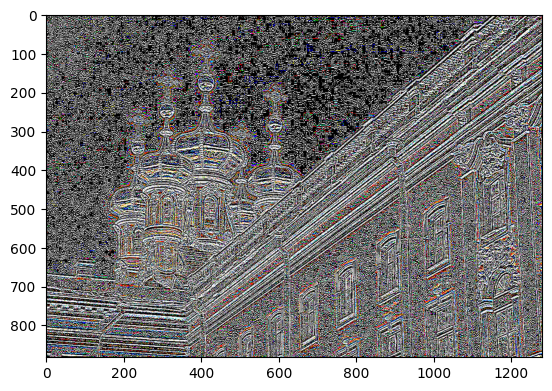

In [50]:
RGB_img_remaining = RGB_img - RGB_img_new
plt.imshow(RGB_img_remaining)

# Задание 5

In [51]:
!wget https://courses.openedu.ru/assets/courseware/v1/4f506ce93d7a12e14b99885402a8652f/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/blur_peter-3794597_1280.jpg

--2023-09-09 19:56:54--  https://courses.openedu.ru/assets/courseware/v1/4f506ce93d7a12e14b99885402a8652f/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/blur_peter-3794597_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1271478 (1.2M) [image/jpeg]
Saving to: ‘blur_peter-3794597_1280.jpg’

blur_peter-3794597_ 100%[===================>]   1.21M  1.69MB/s    in 0.7s    

2023-09-09 19:56:56 (1.69 MB/s) - ‘blur_peter-3794597_1280.jpg’ saved [1271478/1271478]



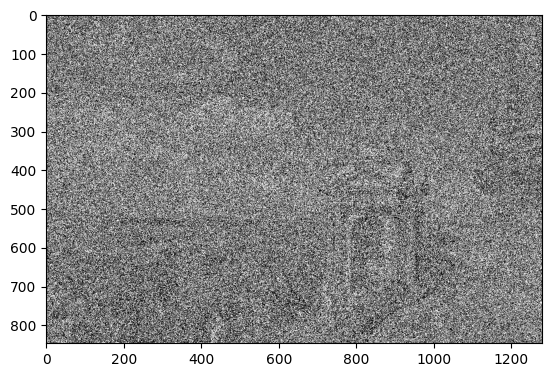

In [52]:
image_name = 'blur_peter-3794597_1280.jpg'
img = cv2.imread(image_name)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [70]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
RGB_img_final = cv2.filter2D(RGB_img, -1, kernel)

In [72]:
fig = plt.figure(figsize=(20, 80))

for i in range (1, 15, 1):
  fig.add_subplot(15, 1, i)
  img_final = cv2.medianBlur(RGB_img, 1+i*2)
  plt.imshow(img_final)

Output hidden; open in https://colab.research.google.com to view.